In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="1" #model will be trained on GPU 1

In [2]:
import tensorflow.keras
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import gzip
%matplotlib inline
from tensorflow.keras.layers import Input,Conv2D,MaxPooling2D,UpSampling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import Constant, RandomNormal
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
file = '../data/Hz31.txt'
data = pd.read_csv(file, names=['z', 'hz', 'err'], sep = " " )
data.describe()

,z,hz,err
count,31.000000,31.000000,31.000000
mean,0.661219,105.922581,21.303226
std,0.520398,38.413424,14.587768
min,0.070000,68.600000,4.000000
25%,0.275000,78.950000,12.000000
50%,0.470000,90.000000,17.000000
75%,0.890000,121.000000,27.900000
max,1.965000,202.000000,62.000000


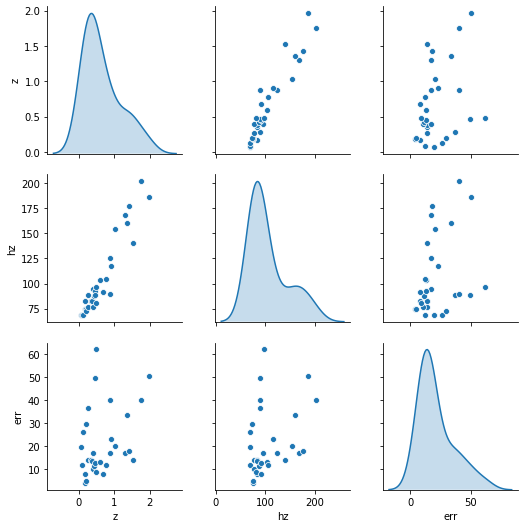

In [4]:
sns.pairplot(data, diag_kind="kde")
plt.savefig("DistHD.png")

In [5]:
# a = np.array([25,  3,  9,  7, 19,  2, 17, 16,  6, 28, 12, 20, 21, 26, 27, 11,  1,
#        10, 30, 13, 29,  0,  8, 18, 24,  5, 23,  4, 22, 15, 14])
# randomize = np.random.permutation(len(data.values))
shuffle = [x for x in range(len(data.values)) if x%2 ==0]
comp = [x for x in range(len(data.values)) if x%2 ==1]
shuffle.extend(comp)

data = data.values[shuffle]
# shuffle

In [6]:
# def norm(x):
#     return (x - train_stats['mean']) / train_stats['std']
# normed_train_data = norm(train_dataset)
# normed_test_data = norm(test_dataset)


Read the data for cosmic chronometers

In [7]:

# odds = [x for x in range(len(data)) if x%2 ==0]
# even = [x for x in range(len(data)) if x%2 ==1]
# new_order = np.array(even+odds)
# new_order = np.array([x for x in range(len(data)-1, 0, -1)])
# data = data.values[new_order]
# data = data.values


In [8]:
z = data[:,0]
y = data[:,1:]
# print(randomize)

In [9]:
scalerz = StandardScaler()
# scalerz = MinMaxScaler(feature_range=(-1,1))
# fit scaler on data
scalerz.fit(z.reshape(-1,1))
# apply transform
z = scalerz.transform(z.reshape(-1,1))

# scalery = MinMaxScaler(feature_range=(0,1))
# scalery = StandardScaler()
# scalery.fit(y)
# y = scalery.transform(y)

In [10]:
split = 0.8
ntrain = int(split * len(z))
indx = [ntrain]
z_train, z_test = np.split(z, indx)
y_train, y_test = np.split(y, indx)

In [11]:
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min',
                                   min_delta=0.0,
                                   patience=50.0,
                                   restore_best_weights=True)]
#                      tf.keras.callbacks.ReduceLROnPlateau(patience=2)]
# initializer = Constant(value=0.01)
# initializer = RandomNormal()
#     efirst = Dense(150, activation='relu', input_shape=(1,))(input_z)
#     ehidden = Dense(50, activation='relu')(efirst)
# #     ehidden = Dense(150, activation='relu')(efirst)
#     ehidden2 = Dense(150, activation='relu')(ehidden)
#     ehidden2 = Dense(150, activation='relu')(ehidden2)
#     elast = Dense(2, activation='relu')(ehidden2)



In [12]:
def model(input_z):
    efirst = Dense(50, activation='relu', input_shape=(1,))(input_z)
    ehidden = Dense(200, activation='relu')(efirst)
    ehidden2 = Dense(150, activation='relu')(ehidden)
    elast = Dense(2, activation='linear')(ehidden2)


    return elast


input_z = Input(shape = (1,))
neural_model = Model(input_z, model(input_z))
neural_model.compile(loss='mean_squared_error', optimizer = "adam")
neural_model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense (Dense)                (None, 50)                100       
_________________________________________________________________
dense_1 (Dense)              (None, 200)               10200     
_________________________________________________________________
dense_2 (Dense)              (None, 150)               30150     
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 302       
Total params: 40,752
Trainable params: 40,752
Non-trainable params: 0
_________________________________________________________________


In [13]:
# batch_size = 4
batch_size = 4
epochs = 100
input_z = Input(shape = (1,))

In [14]:
# autoencoder = Model(input_z, autoencoder(input_z))
# autoencoder.compile(loss='mean_squared_error', optimizer = "adam")
# autoencoder.summary()

In [15]:
model_train = neural_model.fit(z_train, y_train, batch_size=batch_size,
                                    epochs=epochs,verbose=1,
                                    validation_data=(z_test, y_test))
#                                     callbacks=callbacks)

Epoch 1/100
6/6 [==============================] - 0s 16ms/step - loss: 5353.1919 - val_loss: 10961.8154
Epoch 2/100
6/6 [==============================] - 0s 3ms/step - loss: 5312.6265 - val_loss: 10863.8799
Epoch 3/100
6/6 [==============================] - 0s 4ms/step - loss: 5238.2964 - val_loss: 10742.9854
Epoch 4/100
6/6 [==============================] - 0s 4ms/step - loss: 5151.9380 - val_loss: 10533.1309
Epoch 5/100
6/6 [==============================] - 0s 4ms/step - loss: 4978.7095 - val_loss: 10248.2031
Epoch 6/100
6/6 [==============================] - 0s 3ms/step - loss: 4737.8091 - val_loss: 9807.0605
Epoch 7/100
6/6 [==============================] - 0s 3ms/step - loss: 4396.8667 - val_loss: 9184.0938
Epoch 8/100
6/6 [==============================] - 0s 3ms/step - loss: 3888.0081 - val_loss: 8389.1084
Epoch 9/100
6/6 [==============================] - 0s 3ms/step - loss: 3284.6980 - val_loss: 7321.7476
Epoch 10/100
6/6 [==============================] - 0s 3ms/step - l

6/6 [==============================] - 0s 3ms/step - loss: 125.8046 - val_loss: 361.7468
Epoch 82/100
6/6 [==============================] - 0s 3ms/step - loss: 125.5143 - val_loss: 344.5085
Epoch 83/100
6/6 [==============================] - 0s 3ms/step - loss: 127.6074 - val_loss: 326.8067
Epoch 84/100
6/6 [==============================] - 0s 3ms/step - loss: 125.7913 - val_loss: 335.7886
Epoch 85/100
6/6 [==============================] - 0s 2ms/step - loss: 130.6069 - val_loss: 390.6452
Epoch 86/100
6/6 [==============================] - 0s 2ms/step - loss: 127.5580 - val_loss: 375.4831
Epoch 87/100
6/6 [==============================] - 0s 2ms/step - loss: 123.5500 - val_loss: 341.6128
Epoch 88/100
6/6 [==============================] - 0s 2ms/step - loss: 126.5542 - val_loss: 328.7796
Epoch 89/100
6/6 [==============================] - 0s 3ms/step - loss: 125.3730 - val_loss: 338.8508
Epoch 90/100
6/6 [==============================] - 0s 3ms/step - loss: 126.3105 - val_loss: 36

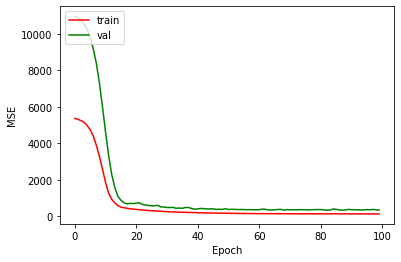

In [16]:
plt.plot(model_train.history['loss'], color='r', )
plt.plot(model_train.history['val_loss'], color='g')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig("loss_hz.png", dpi=200)


In [17]:
# neural_model.save('FFNN_Hz.h5')

In [18]:
#uncer net
unet = np.sqrt(np.min(model_train.history['val_loss']))
print(np.min(model_train.history['loss']), np.min(model_train.history['val_loss']))
print(model_train.history['loss'][-1], model_train.history['val_loss'][-1])
# 119.81427764892578 311.0423889160156 120 epochs
# 120.7300033569336 355.0390930175781

122.92446899414062 326.80670166015625
124.27217864990234 332.0100402832031


In [19]:
pred = neural_model.predict(z_test)
pred

array([[ 89.70016 ,  18.667612],
       [102.52691 ,  21.374992],
       [114.68684 ,  23.923273],
       [116.18725 ,  24.23506 ],
       [143.35779 ,  29.826088],
       [152.521   ,  31.702606],
       [175.55272 ,  36.424583]], dtype=float32)

In [20]:
#zor and yor are the original velues for z and [Hz, err]
zor = scalerz.inverse_transform(z.reshape(-1,1))
# yor = scalery.inverse_transform(y)

In [21]:
# ranz = np.random.uniform(0, 2, size=10000)
ranz = np.linspace(0, 2, 1000)
r = scalerz.transform(ranz.reshape(-1, 1))
pred_random = neural_model.predict(r)
rr = scalerz.inverse_transform(r.reshape(-1,1))
# predy = scalery.inverse_transform(pred_random)


(0.0, 2.0)

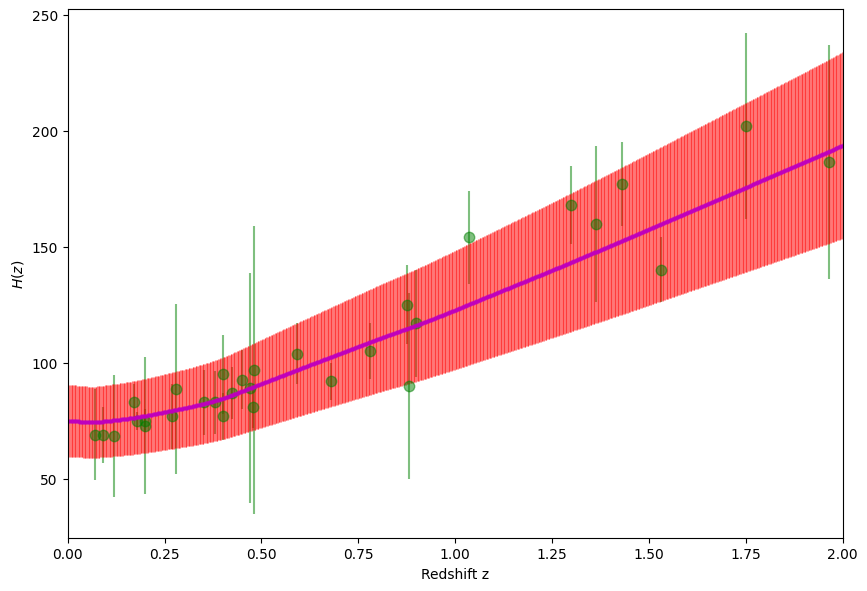

In [22]:
# plt.errorbar(zor, yor[:,0], yor[:,1], fmt='g.', markersize=15, label='Observations', alpha=0.5)
# plt.errorbar(rr, predy[:,0], predy[:,1], fmt='r.', markersize=5, label='Synthetic', alpha=0.01)
plt.figure(figsize=(10, 7), dpi=100)
plt.errorbar(zor, y[:,0], y[:,1], fmt='g.', markersize=15, label='Observations', alpha=0.5)
plt.errorbar(rr, pred_random[:,0], pred_random[:,1], markersize=2, fmt='o', 
             ecolor='r', capthick=2, elinewidth=0.8, alpha=0.5, c='m')
plt.xlabel("Redshift z")

plt.ylabel("$H(z)$")
plt.xlim(0, 2)
# plt.savefig("500_epochs_HD.png")

In [23]:
# Cosmological constants
Om = 0.27
# variance network


In [24]:
def Hlcdm(z, H0=73.24):
    return H0 * np.sqrt(Om*(1+z)**3 + 1 - Om)

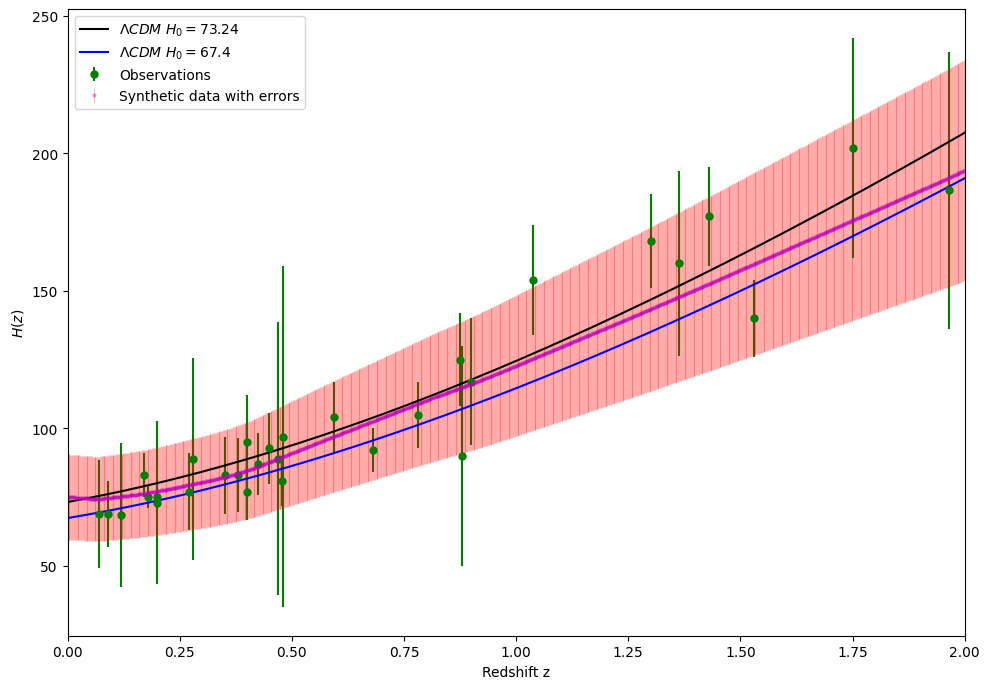

In [25]:
plt.figure(figsize=(10, 7), dpi=100)

zmodel = np.linspace(0, 2, 1000)
# plt.errorbar(zor, yor[:,0], yor[:,1], fmt='g.', markersize=10, label='Observations')
# plt.errorbar(rr, predy[:,0], predy[:,1], fmt='r.', markersize=4., label='Synthetic data with errors', alpha=0.01)
plt.errorbar(zor, y[:,0], y[:,1], fmt='g.', markersize=10, label='Observations')

plt.errorbar(rr, pred_random[:,0], pred_random[:,1], markersize=2., fmt='o', 
             ecolor='r', capthick=2, elinewidth=0.8, alpha=0.3, c='m',
             label='Synthetic data with errors')

plt.plot(zmodel, Hlcdm(zmodel), label='$\Lambda CDM$ $H_0 = 73.24$', c='k')
plt.plot(zmodel, Hlcdm(zmodel, H0=67.4), label='$\Lambda CDM$ $H_0 = 67.4$', c='b')
plt.xlabel("Redshift z")
plt.ylabel("$H(z)$")
plt.xlim(0, 2)
plt.tight_layout()
plt.legend(loc='upper left')

# plt.savefig("SyntheticHDrelu2.png",dpi=800)

## $H_0$

In [49]:
h0 = pred_random[0,:]
h0

array([75.0908 , 15.49033], dtype=float32)

In [26]:
pred_random.shape, r.shape

((1000, 2), (1000, 1))

In [27]:
# randomselection = np.random.randint(0,1000,50)
# randomselection = np.random.randint(0,1000,100)

# rr_reduced = rr[randomselection,:]
# predy_reduced = predy[randomselection,:]

# predy_reduced = pred_random[randomselection,:]
rr_reduced = rr
predy_reduced = pred_random

In [28]:
mookHz = np.concatenate((rr_reduced.reshape(-1,1), predy_reduced), axis=1)


np.savetxt("autoEncoderHz50.dat",mookHz, delimiter=" ")

In [29]:
predy_reduced[:,1]

array([15.49033  , 15.485091 , 15.479854 , 15.474617 , 15.469378 ,
       15.464138 , 15.4588995, 15.453663 , 15.448423 , 15.443185 ,
       15.437948 , 15.432709 , 15.427469 , 15.42223  , 15.416994 ,
       15.411755 , 15.406516 , 15.401276 , 15.396042 , 15.390802 ,
       15.385561 , 15.380324 , 15.375087 , 15.369849 , 15.364611 ,
       15.35937  , 15.3541355, 15.348896 , 15.34366  , 15.338416 ,
       15.333181 , 15.328004 , 15.323452 , 15.321996 , 15.328743 ,
       15.336862 , 15.345034 , 15.353207 , 15.36138  , 15.369553 ,
       15.377724 , 15.385897 , 15.39407  , 15.4022455, 15.410416 ,
       15.418588 , 15.426762 , 15.434932 , 15.443106 , 15.451279 ,
       15.459451 , 15.467626 , 15.475798 , 15.483967 , 15.492142 ,
       15.500311 , 15.508486 , 15.516659 , 15.524832 , 15.533003 ,
       15.541178 , 15.549347 , 15.557523 , 15.565693 , 15.573868 ,
       15.582037 , 15.590211 , 15.599812 , 15.609489 , 15.619165 ,
       15.628847 , 15.638523 , 15.6482   , 15.657881 , 15.6675

In [30]:
error  = predy_reduced[:,1]**2
error

array([ 239.95032,  239.78806,  239.62587,  239.46378,  239.30167,
        239.13957,  238.97757,  238.81569,  238.65378,  238.49196,
        238.33025,  238.1685 ,  238.0068 ,  237.84517,  237.6837 ,
        237.52219,  237.36073,  237.1993 ,  237.0381 ,  236.8768 ,
        236.71548,  236.55438,  236.3933 ,  236.23227,  236.07126,
        235.91025,  235.74948,  235.58861,  235.42792,  235.26701,
        235.10645,  234.94771,  234.80818,  234.76355,  234.97037,
        235.21933,  235.47006,  235.72095,  235.97198,  236.22314,
        236.47438,  236.72581,  236.97739,  237.22917,  237.48091,
        237.73285,  237.98497,  238.23712,  238.48952,  238.74202,
        238.99461,  239.24744,  239.50032,  239.75323,  240.00645,
        240.25964,  240.51314,  240.7667 ,  241.0204 ,  241.27419,
        241.5282 ,  241.7822 ,  242.03651,  242.2908 ,  242.54536,
        242.79988,  243.05467,  243.35413,  243.65616,  243.95833,
        244.26086,  244.5634 ,  244.86617,  245.16924,  245.47

In [31]:
diagcov = np.diag(error) #inverso
np.savetxt("autoEncoderHz_cov50.dat", diagcov, delimiter= " ", header="#50 50")
np.shape(diagcov)

(1000, 1000)

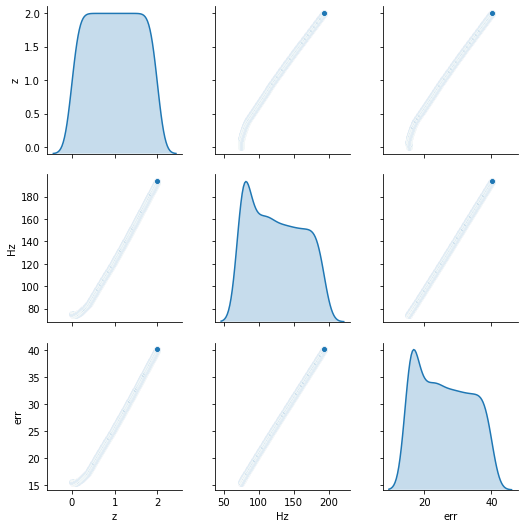

In [32]:
dfMook = pd.DataFrame(mookHz, columns=['z', 'Hz', 'err'])
sns.pairplot(dfMook, diag_kind="kde")
# plt.savefig("50hdmook.png")

In [33]:
# plt.plot(model_train.history['loss'], color='r')
# plt.plot(model_train.history['val_loss'], color='g')
# plt.xlim(1)
# plt.xscale('log')
# plt.ylabel('MSE')
# # plt.yscale('log')
# plt.xlabel('Epoch')
# plt.legend(['train', 'val'], loc='upper right')
# # plt.savefig("loss_hz.png", dpi=200)
# # plt.savefig("epochs_for_Hz.png", dpi=200)

In [34]:
def model2(input_z):
    x = Dense(50, activation='relu', input_shape=(1,))(input_z)
    x = Dense(200, activation='relu')(x)
    x = Dense(150, activation='relu')(x)
    x = Dense(2, activation='linear')(x)


    return elast


input_z = Input(shape = (1,))
neural_model2 = Model(input_z, model(input_z))
neural_model2.compile(loss='mean_squared_error', optimizer = "adam")
neural_model2.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense_4 (Dense)              (None, 50)                100       
_________________________________________________________________
dense_5 (Dense)              (None, 200)               10200     
_________________________________________________________________
dense_6 (Dense)              (None, 150)               30150     
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 302       
Total params: 40,752
Trainable params: 40,752
Non-trainable params: 0
_________________________________________________________________


#### Now, we not use the statistical error and only use a ANN to given redshift predict $H(z)$. And we estimates its uncertainty with dropout layers.

In [35]:
yy = y[:,0].reshape(-1,1)
zz = z
split = 0.8
ntrain = int(split * len(zz))
indx = [ntrain]
zz_train, zz_test = np.split(zz, indx)
yy_train, yy_test = np.split(yy, indx)
np.shape(zz_train), np.shape(yy_train), np.shape(zz_test), np.shape(yy_test)

((24, 1), (24, 1), (7, 1), (7, 1))

In [36]:
from astroNN.nn.layers import MCDropout

In [37]:
def model_regression_dropout(num_hidden):
    # Defeine Keras model for regression
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.InputLayer(batch_input_shape=((None, 1))))
    model.add(Dense(units=num_hidden[0], 
#                     kernel_regularizer=tf.keras.regularizers.l2(1e-4),
#                     kernel_initializer='he_normal', 
                    activation='relu'))
    model.add(MCDropout(0.3))
    model.add(Dense(units=num_hidden[1], 
#                     kernel_regularizer=tf.keras.regularizers.l2(1e-4),
#                     kernel_initializer='he_normal', 
                    activation='relu'))
    model.add(MCDropout(0.3))
    model.add(Dense(units=num_hidden[2], 
#                     kernel_regularizer=tf.keras.regularizers.l2(1e-4),
#                     kernel_initializer='he_normal', 
                    activation='relu'))
    model.add(MCDropout(0.3))
    model.add(Dense(units=2, activation="linear"))
    return model

#Define some parameter
batch_size = 4
# optimizer = Adam(lr=.005)
optimizer = Adam(lr=0.0001)


# Compile Keras model
model = model_regression_dropout(num_hidden=[50, 200, 150])
model.compile(loss='mse', optimizer=optimizer) 
# model2_train = model.fit(zz_train, yy_train, 
# #                          validation_split=0.0, 
#                          batch_size=batch_size, epochs=1000, verbose=1,
#                          validation_data=(zz_test, yy_test))    
model2_train = model.fit(z_train, y_train, batch_size=batch_size,
                                    epochs=800,verbose=1,
                                    validation_data=(z_test, y_test))

Epoch 1/800
6/6 [==============================] - 0s 14ms/step - loss: 5374.7446 - val_loss: 11022.5371
Epoch 2/800
6/6 [==============================] - 0s 3ms/step - loss: 5369.3667 - val_loss: 11011.2627
Epoch 3/800
6/6 [==============================] - 0s 3ms/step - loss: 5366.8223 - val_loss: 11018.7715
Epoch 4/800
6/6 [==============================] - 0s 3ms/step - loss: 5363.7705 - val_loss: 11015.4863
Epoch 5/800
6/6 [==============================] - 0s 3ms/step - loss: 5363.1738 - val_loss: 11018.4424
Epoch 6/800
6/6 [==============================] - 0s 3ms/step - loss: 5354.3438 - val_loss: 11011.0488
Epoch 7/800
6/6 [==============================] - 0s 3ms/step - loss: 5356.2017 - val_loss: 11001.2480
Epoch 8/800
6/6 [==============================] - 0s 3ms/step - loss: 5348.5659 - val_loss: 10987.3037
Epoch 9/800
6/6 [==============================] - 0s 3ms/step - loss: 5344.9780 - val_loss: 10995.4580
Epoch 10/800
6/6 [==============================] - 0s 3ms/step

6/6 [==============================] - 0s 3ms/step - loss: 2573.5833 - val_loss: 7316.2144
Epoch 80/800
6/6 [==============================] - 0s 3ms/step - loss: 2277.5515 - val_loss: 7062.5166
Epoch 81/800
6/6 [==============================] - 0s 3ms/step - loss: 2247.3870 - val_loss: 7089.6562
Epoch 82/800
6/6 [==============================] - 0s 3ms/step - loss: 2161.3093 - val_loss: 7055.3169
Epoch 83/800
6/6 [==============================] - 0s 3ms/step - loss: 2193.5178 - val_loss: 6449.8950
Epoch 84/800
6/6 [==============================] - 0s 3ms/step - loss: 2051.2131 - val_loss: 6916.2837
Epoch 85/800
6/6 [==============================] - 0s 3ms/step - loss: 2005.4248 - val_loss: 6683.1616
Epoch 86/800
6/6 [==============================] - 0s 3ms/step - loss: 2031.1953 - val_loss: 6839.8237
Epoch 87/800
6/6 [==============================] - 0s 3ms/step - loss: 1999.2549 - val_loss: 6296.2866
Epoch 88/800
6/6 [==============================] - 0s 3ms/step - loss: 1812.

6/6 [==============================] - 0s 3ms/step - loss: 553.6552 - val_loss: 1395.3679
Epoch 158/800
6/6 [==============================] - 0s 3ms/step - loss: 425.0272 - val_loss: 1359.1638
Epoch 159/800
6/6 [==============================] - 0s 3ms/step - loss: 526.7880 - val_loss: 1515.2726
Epoch 160/800
6/6 [==============================] - 0s 3ms/step - loss: 511.1523 - val_loss: 1207.1180
Epoch 161/800
6/6 [==============================] - 0s 3ms/step - loss: 641.5804 - val_loss: 893.3721
Epoch 162/800
6/6 [==============================] - 0s 3ms/step - loss: 549.2084 - val_loss: 1070.7323
Epoch 163/800
6/6 [==============================] - 0s 3ms/step - loss: 367.9587 - val_loss: 1415.9454
Epoch 164/800
6/6 [==============================] - 0s 3ms/step - loss: 511.1934 - val_loss: 844.2132
Epoch 165/800
6/6 [==============================] - 0s 3ms/step - loss: 512.4645 - val_loss: 1051.2524
Epoch 166/800
6/6 [==============================] - 0s 3ms/step - loss: 525.787

6/6 [==============================] - 0s 3ms/step - loss: 356.0382 - val_loss: 617.0352
Epoch 237/800
6/6 [==============================] - 0s 3ms/step - loss: 384.3470 - val_loss: 545.5493
Epoch 238/800
6/6 [==============================] - 0s 3ms/step - loss: 400.0250 - val_loss: 835.4323
Epoch 239/800
6/6 [==============================] - 0s 3ms/step - loss: 317.8842 - val_loss: 852.8835
Epoch 240/800
6/6 [==============================] - 0s 3ms/step - loss: 262.4304 - val_loss: 797.9604
Epoch 241/800
6/6 [==============================] - 0s 3ms/step - loss: 351.8947 - val_loss: 656.5025
Epoch 242/800
6/6 [==============================] - 0s 3ms/step - loss: 294.3357 - val_loss: 496.4882
Epoch 243/800
6/6 [==============================] - 0s 3ms/step - loss: 321.4558 - val_loss: 608.7631
Epoch 244/800
6/6 [==============================] - 0s 3ms/step - loss: 471.2222 - val_loss: 997.9752
Epoch 245/800
6/6 [==============================] - 0s 3ms/step - loss: 419.3998 - val

6/6 [==============================] - 0s 3ms/step - loss: 272.8173 - val_loss: 814.5550
Epoch 316/800
6/6 [==============================] - 0s 3ms/step - loss: 380.6181 - val_loss: 661.7379
Epoch 317/800
6/6 [==============================] - 0s 3ms/step - loss: 340.8954 - val_loss: 571.4764
Epoch 318/800
6/6 [==============================] - 0s 3ms/step - loss: 387.1162 - val_loss: 455.3753
Epoch 319/800
6/6 [==============================] - 0s 3ms/step - loss: 302.4433 - val_loss: 424.5650
Epoch 320/800
6/6 [==============================] - 0s 3ms/step - loss: 356.1680 - val_loss: 588.7361
Epoch 321/800
6/6 [==============================] - 0s 3ms/step - loss: 256.1530 - val_loss: 713.1017
Epoch 322/800
6/6 [==============================] - 0s 3ms/step - loss: 281.7514 - val_loss: 374.2516
Epoch 323/800
6/6 [==============================] - 0s 3ms/step - loss: 194.2382 - val_loss: 485.9785
Epoch 324/800
6/6 [==============================] - 0s 3ms/step - loss: 304.6006 - val

6/6 [==============================] - 0s 3ms/step - loss: 265.6186 - val_loss: 553.9445
Epoch 395/800
6/6 [==============================] - 0s 3ms/step - loss: 254.7408 - val_loss: 413.9704
Epoch 396/800
6/6 [==============================] - 0s 3ms/step - loss: 300.4247 - val_loss: 580.9031
Epoch 397/800
6/6 [==============================] - 0s 3ms/step - loss: 222.6088 - val_loss: 355.4861
Epoch 398/800
6/6 [==============================] - 0s 3ms/step - loss: 263.7155 - val_loss: 361.4709
Epoch 399/800
6/6 [==============================] - 0s 3ms/step - loss: 310.5863 - val_loss: 313.3047
Epoch 400/800
6/6 [==============================] - 0s 3ms/step - loss: 165.5951 - val_loss: 1196.2230
Epoch 401/800
6/6 [==============================] - 0s 3ms/step - loss: 250.2697 - val_loss: 863.9454
Epoch 402/800
6/6 [==============================] - 0s 3ms/step - loss: 243.1037 - val_loss: 433.0425
Epoch 403/800
6/6 [==============================] - 0s 3ms/step - loss: 244.8521 - va

6/6 [==============================] - 0s 3ms/step - loss: 268.5295 - val_loss: 346.5297
Epoch 474/800
6/6 [==============================] - 0s 3ms/step - loss: 165.4172 - val_loss: 684.2236
Epoch 475/800
6/6 [==============================] - 0s 3ms/step - loss: 270.1115 - val_loss: 262.8863
Epoch 476/800
6/6 [==============================] - 0s 3ms/step - loss: 238.4088 - val_loss: 554.6808
Epoch 477/800
6/6 [==============================] - 0s 3ms/step - loss: 227.4522 - val_loss: 279.7230
Epoch 478/800
6/6 [==============================] - 0s 3ms/step - loss: 353.6845 - val_loss: 679.0521
Epoch 479/800
6/6 [==============================] - 0s 3ms/step - loss: 183.3244 - val_loss: 319.2473
Epoch 480/800
6/6 [==============================] - 0s 3ms/step - loss: 174.2598 - val_loss: 544.8165
Epoch 481/800
6/6 [==============================] - 0s 3ms/step - loss: 260.8377 - val_loss: 533.9309
Epoch 482/800
6/6 [==============================] - 0s 3ms/step - loss: 198.8865 - val

6/6 [==============================] - 0s 3ms/step - loss: 252.5696 - val_loss: 556.7811
Epoch 553/800
6/6 [==============================] - 0s 3ms/step - loss: 253.2393 - val_loss: 738.5025
Epoch 554/800
6/6 [==============================] - 0s 3ms/step - loss: 279.1125 - val_loss: 447.8410
Epoch 555/800
6/6 [==============================] - 0s 3ms/step - loss: 163.6893 - val_loss: 593.2704
Epoch 556/800
6/6 [==============================] - 0s 3ms/step - loss: 250.1011 - val_loss: 452.8560
Epoch 557/800
6/6 [==============================] - 0s 3ms/step - loss: 187.1382 - val_loss: 364.2501
Epoch 558/800
6/6 [==============================] - 0s 3ms/step - loss: 229.5606 - val_loss: 422.9752
Epoch 559/800
6/6 [==============================] - 0s 3ms/step - loss: 282.3159 - val_loss: 282.7657
Epoch 560/800
6/6 [==============================] - 0s 3ms/step - loss: 211.3791 - val_loss: 760.8584
Epoch 561/800
6/6 [==============================] - 0s 3ms/step - loss: 312.6159 - val

6/6 [==============================] - 0s 3ms/step - loss: 194.5104 - val_loss: 400.8056
Epoch 632/800
6/6 [==============================] - 0s 3ms/step - loss: 223.7300 - val_loss: 660.9713
Epoch 633/800
6/6 [==============================] - 0s 3ms/step - loss: 170.8060 - val_loss: 480.1219
Epoch 634/800
6/6 [==============================] - 0s 3ms/step - loss: 222.2156 - val_loss: 420.3167
Epoch 635/800
6/6 [==============================] - 0s 3ms/step - loss: 269.5603 - val_loss: 889.2128
Epoch 636/800
6/6 [==============================] - 0s 3ms/step - loss: 260.6902 - val_loss: 618.2054
Epoch 637/800
6/6 [==============================] - 0s 3ms/step - loss: 147.2064 - val_loss: 291.5919
Epoch 638/800
6/6 [==============================] - 0s 3ms/step - loss: 268.3159 - val_loss: 918.2077
Epoch 639/800
6/6 [==============================] - 0s 3ms/step - loss: 333.8805 - val_loss: 483.2140
Epoch 640/800
6/6 [==============================] - 0s 3ms/step - loss: 273.1849 - val

6/6 [==============================] - 0s 3ms/step - loss: 238.7647 - val_loss: 751.9399
Epoch 711/800
6/6 [==============================] - 0s 3ms/step - loss: 193.2333 - val_loss: 615.7632
Epoch 712/800
6/6 [==============================] - 0s 3ms/step - loss: 204.8132 - val_loss: 426.9267
Epoch 713/800
6/6 [==============================] - 0s 3ms/step - loss: 181.0856 - val_loss: 614.0829
Epoch 714/800
6/6 [==============================] - 0s 3ms/step - loss: 178.0958 - val_loss: 592.2680
Epoch 715/800
6/6 [==============================] - 0s 3ms/step - loss: 246.0247 - val_loss: 523.4525
Epoch 716/800
6/6 [==============================] - 0s 3ms/step - loss: 241.9657 - val_loss: 798.9645
Epoch 717/800
6/6 [==============================] - 0s 3ms/step - loss: 160.4281 - val_loss: 696.4510
Epoch 718/800
6/6 [==============================] - 0s 3ms/step - loss: 188.4623 - val_loss: 530.9618
Epoch 719/800
6/6 [==============================] - 0s 3ms/step - loss: 220.5620 - val

6/6 [==============================] - 0s 3ms/step - loss: 136.0287 - val_loss: 307.2609
Epoch 790/800
6/6 [==============================] - 0s 3ms/step - loss: 224.6948 - val_loss: 486.9124
Epoch 791/800
6/6 [==============================] - 0s 3ms/step - loss: 210.8965 - val_loss: 441.4180
Epoch 792/800
6/6 [==============================] - 0s 3ms/step - loss: 274.1405 - val_loss: 400.9434
Epoch 793/800
6/6 [==============================] - 0s 3ms/step - loss: 224.6278 - val_loss: 671.9466
Epoch 794/800
6/6 [==============================] - 0s 3ms/step - loss: 208.0148 - val_loss: 334.0634
Epoch 795/800
6/6 [==============================] - 0s 3ms/step - loss: 128.7131 - val_loss: 606.4834
Epoch 796/800
6/6 [==============================] - 0s 3ms/step - loss: 344.6073 - val_loss: 791.9598
Epoch 797/800
6/6 [==============================] - 0s 3ms/step - loss: 208.3997 - val_loss: 332.6639
Epoch 798/800
6/6 [==============================] - 0s 3ms/step - loss: 167.3883 - val

In [38]:
# Generate test data
test_batch_size = 1000
# x_test = np.random.uniform(0, 2., test_batch_size)
x_test = np.linspace(0, 2., test_batch_size)

mc_dropout_num = 100  # Run Dropout 100 times
predictions = np.zeros((mc_dropout_num, test_batch_size, 2))
uncertainty = np.zeros((mc_dropout_num, test_batch_size, 1))
for i in range(mc_dropout_num):
    predictions[i] = model.predict(scalerz.transform(x_test.reshape(-1,1)))
    
# get mean results and its varience
prediction_mc_dropout = np.mean(predictions, axis=0)
std_mc_dropout = np.std(predictions, axis=0)

In [39]:
np.mean(std_mc_dropout[:,0]), np.mean(std_mc_dropout[:,1])

(16.657404450792328, 5.123804960354938)

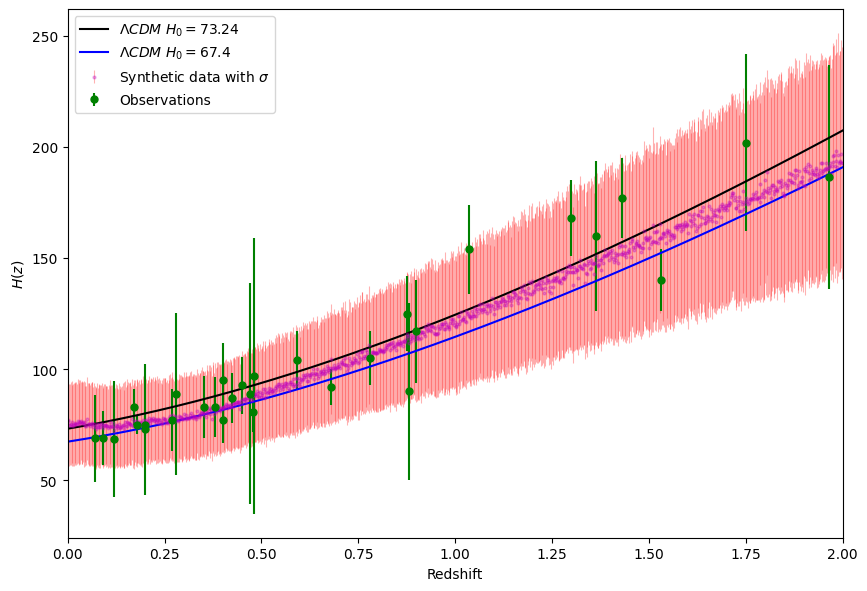

In [40]:
# Plotting
plt.figure(figsize=(10, 7), dpi=100)
# plt.figure(figsize=(5, 4), dpi=100)
sigma = np.sqrt(std_mc_dropout[:, 0]**2 + std_mc_dropout[:, 1]**2+ prediction_mc_dropout[:,1]**2)
plt.errorbar(x_test, prediction_mc_dropout[:,0], yerr=sigma, markersize=2, fmt='o', 
             ecolor='r', capthick=2, elinewidth=0.8, alpha=0.3, c='m',
             label='Synthetic data with $\sigma$')

# plt.scatter(scalerz.inverse_transform(zz), yy, color='k', label='Original cosmic chronometers')
plt.errorbar(zor, y[:,0], y[:,1], fmt='g.', markersize=10, label='Observations')
plt.plot(zmodel, Hlcdm(zmodel), label='$\Lambda CDM$ $H_0 = 73.24$', c='k')
plt.plot(zmodel, Hlcdm(zmodel, H0=67.4), label='$\Lambda CDM$ $H_0 = 67.4$', c='b')
plt.xlim(0,2)
plt.xlabel('Redshift')
plt.ylabel('$H(z)$')
# plt.legend(loc='best')
plt.legend(loc='upper left')
# plt.show()
plt.savefig('Hz_dropout800.png', dpi=100)

## $H_0$

In [50]:
 prediction_mc_dropout[0,:]

array([77.08609478, 15.91557017])

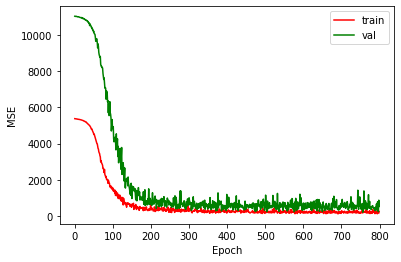

In [41]:
plt.plot(model2_train.history['loss'], color='r')
plt.plot(model2_train.history['val_loss'], color='g')
plt.ylabel('MSE')
plt.xlabel('Epoch')
# plt.xscale('log')
plt.legend(['train', 'val'], loc='upper right')
plt.savefig('lossHzdropout10mil.png', dpi=100)

In [42]:
# model.save('FFNN+MC-DO_Hz.h5')

In [43]:
mookdpHz = np.concatenate((x_test.reshape(-1,1), prediction_mc_dropout), axis=1)

np.savetxt("autoEncoderHz50dropout.dat",mookdpHz, delimiter=" ")

In [44]:
diagcov2 = np.diag(sigma**2) #inverso
np.savetxt("autoEncoderHz_cov50dropout.dat", diagcov2, delimiter= " ", header="#50 50")

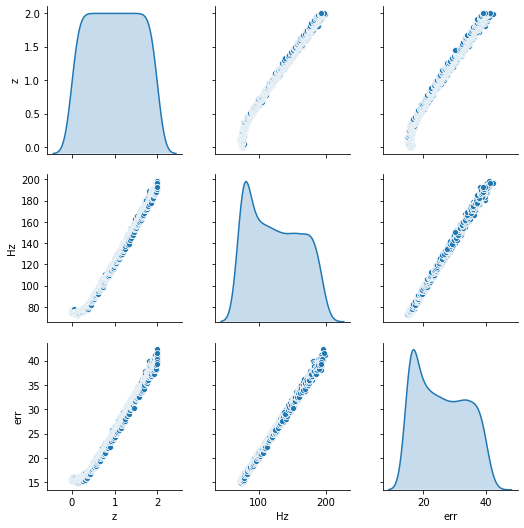

In [45]:
dfMook = pd.DataFrame(mookdpHz, columns=['z', 'Hz', 'err'])
sns.pairplot(dfMook, diag_kind="kde")
# plt.savefig("50hdmookdropout.png")